<a href="https://colab.research.google.com/github/Pranayshukla0610/Ensemble_learning_machine_learning/blob/main/Bagging_Classifier_on_Heart_Data_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/content/heart (3).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


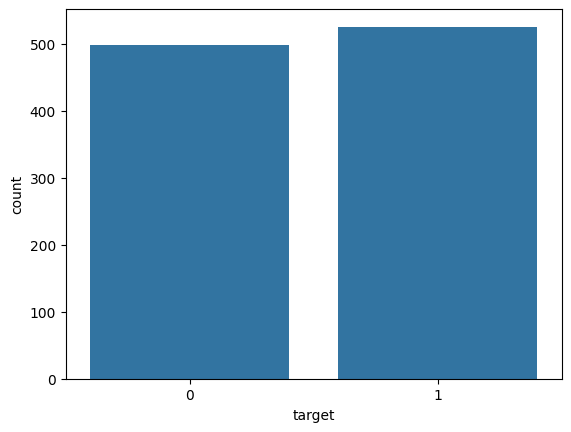

In [6]:
sns.countplot(x='target',data=df)
plt.show()

In [7]:
X = df.drop('target',axis=1)
y = df['target']

In [8]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [9]:
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [10]:
cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent'))
])

In [11]:
preprocessor = ColumnTransformer([
    ('num',num_pipeline,num_cols),
    ('cat',cat_pipeline, cat_cols)
])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
base_model = DecisionTreeClassifier()
bag_model = Pipeline([
    ('prep',preprocessor),
    ('bag',BaggingClassifier(
        estimator=base_model,
        n_estimators=50,
        max_samples=0.8,
        bootstrap=True,
        random_state=42
    ))
])

In [14]:
bag_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index([], dtype='object'))])),
                ('bag',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_samples=0.8, n_estimators=50,
                                   random_state=42))])

In [15]:
pred = bag_model.predict(X_test)

print('Accuracy:',accuracy_score(pred,y_test))
print(classification_report(y_test,pred))

Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



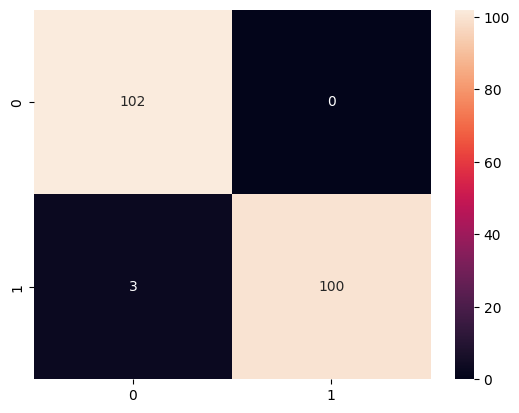

In [16]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='d')
plt.show()

In [17]:
from sklearn.decomposition import PCA

X_scaled = preprocessor.fit_transform(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_2d, y, test_size=0.2
)

bag2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50)
bag2.fit(X_train2, y_train2)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

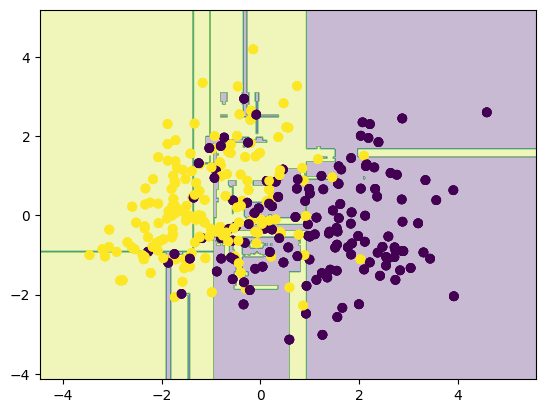

In [18]:
h = .02
x_min, x_max = X_2d[:,0].min()-1, X_2d[:,0].max()+1
y_min, y_max = X_2d[:,1].min()-1, X_2d[:,1].max()+1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = bag2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_2d[:,0], X_2d[:,1], c=y)
plt.show()


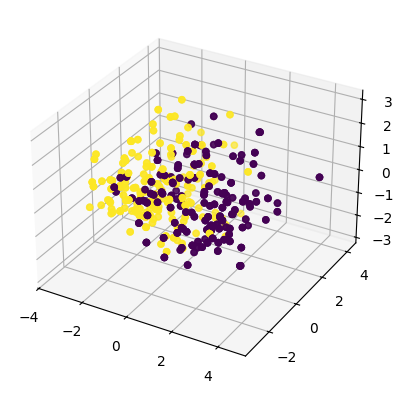

In [19]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
X_3d = pca3.fit_transform(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_3d[:,0],
    X_3d[:,1],
    X_3d[:,2],
    c=y
)

plt.show()


In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

In [21]:
df["chol_age"] = df["chol"] * df["age"]

In [22]:
from sklearn.linear_model import LogisticRegression

bag_lr = BaggingClassifier(
    LogisticRegression(max_iter=1000),
    n_estimators=50
)

bag_lr.fit(X_train2, y_train2)

BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=50)

In [23]:
from sklearn.svm import SVC

bag_svm = BaggingClassifier(
    SVC(probability=True),
    n_estimators=20
)

In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    "bag__n_estimators":[10,50,100],
    "bag__max_samples":[0.5,0.7,1.0]
}

grid = GridSearchCV(bag_model, params, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)


{'bag__max_samples': 1.0, 'bag__n_estimators': 100}


In [25]:
bag_oob = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    oob_score=True
)

bag_oob.fit(X_scaled, y)

print(bag_oob.oob_score_)


1.0


In [26]:
BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    n_jobs=-1
)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1)

In [27]:
from sklearn.utils import resample

models = []

for i in range(20):
    X_res, y_res = resample(X_train2, y_train2)
    model = DecisionTreeClassifier()
    model.fit(X_res, y_res)
    models.append(model)


In [28]:
final_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", BaggingClassifier(
        DecisionTreeClassifier(max_depth=5),
        n_estimators=200,
        n_jobs=-1
    ))
])

final_pipeline.fit(X, y)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index([], dtype='object'))])),
                ('model',
                 BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                                   n_estimators=200, n_jobs=-1))])

In [29]:
import joblib
joblib.dump(final_pipeline, "bagging_model.pkl")


['bagging_model.pkl']